# The purpose of this project is to show applications of stochastic differential equations in context of predicting future interst rates. 
## Data used for 03.01.2025

### In this project I will use the (annual) yields of 3-month bonds with rating AAA in euro area, so extremly save assets that can be treated almost as "risk free" assets and be used as risk-free rate.

The data can be found here: 

https://data.ecb.europa.eu/data/datasets/YC/YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_3M?chart_props=W3sibm9kZUlkIjoiMTg5NTYzMSIsInByb3BlcnRpZXMiOlt7ImNvbG9ySGV4IjoiIiwiY29sb3JUeXBlIjoiIiwiY2hhcnRUeXBlIjoibGluZWNoYXJ0IiwibGluZVN0eWxlIjoiU29saWQiLCJsaW5lV2lkdGgiOiIxLjUiLCJheGlzUG9zaXRpb24iOiJsZWZ0Iiwib2JzZXJ2YXRpb25WYWx1ZSI6ZmFsc2UsImRhdGVzIjpbIjIwMjItMDYtMTJUMjI6MDA6MDAuMDAwWiIsIjIwMjQtMDYtMTJUMjI6MDA6MDAuMDAwWiJdLCJpc1RkYXRhIjpmYWxzZSwibW9kaWZpZWRVbml0VHlwZSI6IiIsInllYXIiOiJkYXRld2lzZSIsInN0YXJ0RGF0ZSI6IjIwMjItMDYtMTMiLCJlbmREYXRlIjoiMjAyNC0wNi0xMyIsInNldERhdGUiOnRydWUsInNob3dUYWJsZURhdGEiOnRydWUsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTUzNiwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjp0cnVlLCJpc2RhdGFjb21wYXJpc29uIjpmYWxzZSwic2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkgLSBidXNpbmVzc3dlZWsiLCJpbnRpYWxTZXJpZXNGcmVxdWVuY3kiOiJkYWlseSAtIGJ1c2luZXNzd2VlayIsIm1ldGFkYXRhRGVjaW1hbCI6IjYiLCJpc1RhYmxlU29ydGVkIjpmYWxzZSwiaXNZZWFybHlUZGF0YSI6ZmFsc2UsInJlc3BvbnNlRGF0YUVuZERhdGUiOiIiLCJpc2luaXRpYWxDaGFydERhdGEiOnRydWUsImlzRGF0ZXNGcm9tRGF0ZVBpY2tlciI6dHJ1ZSwiZGF0ZVBpY2tlckVuZERhdGUiOiIyMDI0LTA2LTEzIiwiaXNEYXRlUGlja2VyRW5kRGF0ZSI6dHJ1ZSwic2VyaWVza2V5U2V0IjoiIiwiZGF0YXNldElkIjoiMTI1IiwiaXNDYWxsYmFjayI6ZmFsc2UsImlzU2xpZGVyVGRhdGEiOnRydWUsImlzU2xpZGVyRGF0YSI6dHJ1ZSwiaXNJbml0aWFsQ2hhcnREYXRhRnJvbUdyYXBoIjp0cnVlLCJjaGFydFNlcmllc0tleSI6IllDLkIuVTIuRVVSLjRGLkdfTl9BLlNWX0NfWU0uU1JfM00iLCJ0eXBlT2YiOiIifV19XQ%3D%3D

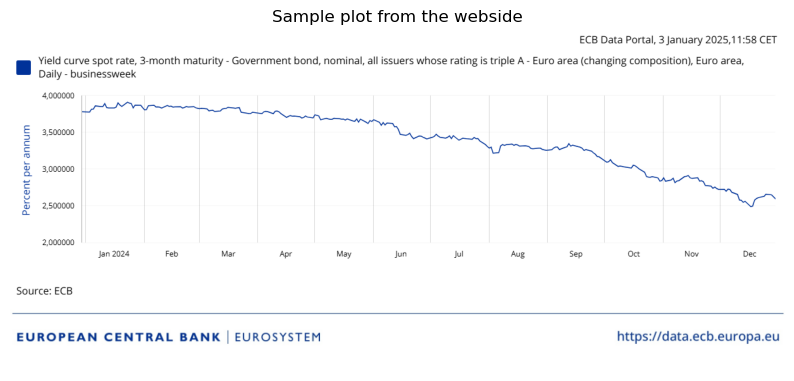

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import random
random.seed(5682990457)

img = mpimg.imread('C:/Users/dawid/PythonScripts/ECB Data Portal_20250103115854.png')
plt.figure(figsize=(10, 8))
plt.title('Sample plot from the webside')
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
data = pd.read_csv('ECB Data Portal_20250103115832.csv')
data

,DATE,TIME PERIOD,"Yield curve spot rate, 3-month maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_3M)"
0,2004-09-06,06 Sep 2004,2.034172
1,2004-09-07,07 Sep 2004,2.040893
2,2004-09-08,08 Sep 2004,2.044384
3,2004-09-09,09 Sep 2004,2.037111
4,2004-09-10,10 Sep 2004,2.034645
...,...,...,...
5191,2024-12-23,23 Dec 2024,2.632250
5192,2024-12-24,24 Dec 2024,2.661780
5193,2024-12-27,27 Dec 2024,2.653268
5194,2024-12-30,30 Dec 2024,2.575177


### Now I will make the data nicer and plot it

In [5]:
data = data.rename(columns={'Yield curve spot rate, 3-month maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_3M)':'Yield'})
data = data.loc[:,("DATE",'Yield')]
data = data.set_index('DATE')
data

,Yield
DATE,
2004-09-06,2.034172
2004-09-07,2.040893
2004-09-08,2.044384
2004-09-09,2.037111
2004-09-10,2.034645
...,...
2024-12-23,2.632250
2024-12-24,2.661780
2024-12-27,2.653268


([<matplotlib.axis.XTick at 0x2470019a890>,
 [Text(1.0, 0, '2023-07-28'),
  Text(34.09090909090909, 0, '2023-09-13'),
  Text(67.18181818181819, 0, '2023-10-30'),
  Text(100.27272727272728, 0, '2023-12-15'),
  Text(133.36363636363637, 0, '2024-02-05'),
  Text(166.45454545454547, 0, '2024-03-21'),
  Text(199.54545454545456, 0, '2024-05-13'),
  Text(232.63636363636365, 0, '2024-06-27'),
  Text(265.72727272727275, 0, '2024-08-13'),
  Text(298.81818181818187, 0, '2024-09-27'),
  Text(331.90909090909093, 0, '2024-11-13'),
  Text(365.0, 0, '')])

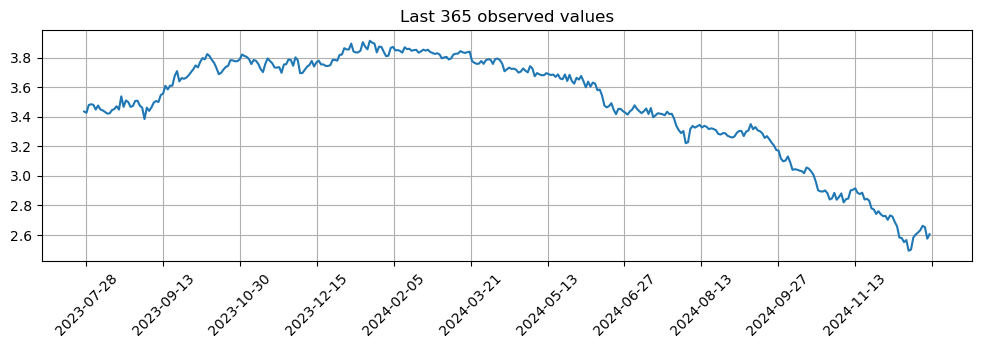

In [6]:
plt.figure(figsize=(12,3))
plt.title('Last 365 observed values')
plt.grid()
plt.plot(data.iloc[-365:,])
plt.xticks(np.linspace(1,365,12), rotation=45)

### As we can expect it is suboptimal to consider whole data to make some predictions for the future, but what is more important it is not safe to estimate parameters of SDEs using whole data. 

### I will assume, that the SDE describes well only local behavior, so I will use only last 100 observations. The data that I will use for the rest of the notebook is:

([<matplotlib.axis.XTick at 0x247001f7dd0>,
 [Text(1.0, 0, '2024-08-13'),
  Text(10.0, 0, '2024-08-26'),
  Text(19.0, 0, '2024-09-06'),
  Text(28.0, 0, '2024-09-19'),
  Text(37.0, 0, '2024-10-02'),
  Text(46.0, 0, '2024-10-15'),
  Text(55.0, 0, '2024-10-28'),
  Text(64.0, 0, '2024-11-08'),
  Text(73.0, 0, '2024-11-21'),
  Text(82.0, 0, '2024-12-04'),
  Text(91.0, 0, '2024-12-17'),
  Text(100.0, 0, '')])

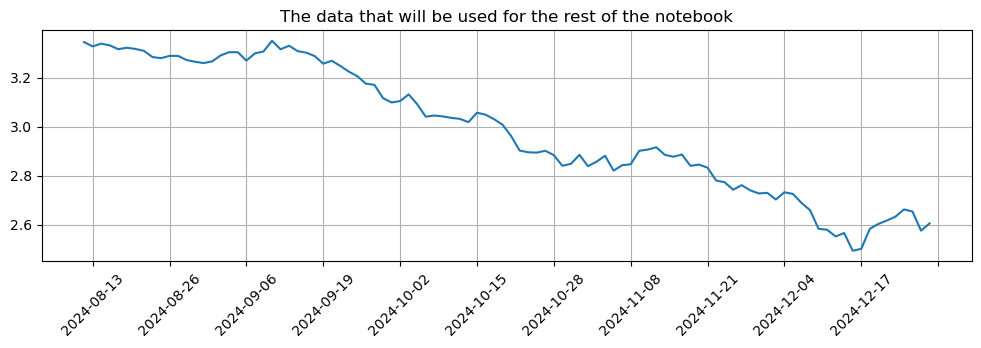

In [7]:
data = data.iloc[-100:,]
plt.figure(figsize=(12,3))
plt.title('The data that will be used for the rest of the notebook')
plt.grid()
plt.plot(data)
plt.xticks(np.linspace(1,100,12), rotation=45)

# Stochastic Differential Equations

### Since I have my data prepared I can start focusing on proper approach to the Stochastic Differential Equation part. We know that SDEs are equations in form $$dX_t=\mu(X_t,t)dt+\sigma(X_t,t)dW_t$$

### where $\mu(X_t,t)$ and $\sigma(X_t,t)$ are some functions. 

### It is very hard to solve majority of SDEs, but in such situations Monte Carlo methors are being used. Especially important here are two famous schemes - Euler-Maryuama and Milstein

# Euler-Maryuama scheme

### This method allows us to simulate paths of SDEs using approximation for discrete time period.

### If we want to simulate paths on time interval $[0,T]$ for SDE in form of $dX_t=\mu(X_t,t)dt+\sigma(X_t,t)dW_t$ in $N$ steps (most commonly equaly splited, so $\Delta t=Const.=\frac{T}{N}$) we can follow the recursion:

### $X_0=x_0$ and  for $n \in \{1,2,..,N-1\}$,  $$X_{(n+1)\Delta t}=X_{n \Delta t}+\mu(X_{n \Delta t},n \Delta t)\times \Delta t+\sigma(X_{n \Delta t},n \Delta t)\times \Delta W_t$$

### Where $\Delta W_t$ is a random variable with distribution $N(0,\Delta t)$



### This method is very general and allows to recieve good results at the final point T, but the paths itselves do not have such great properties. 

### It is the consequence of diference in the convergency orders. Euler is weakly convergent in order 1 (same as Milstein) wheares Euler is strongly convergent in order 0.5 (Milstein in order 1).

### Thus this method is preferable in clasic vanilla options where matters only the value at the maturity of some asset.

sources:
https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method

# Milstein scheme

### To consider this scheme we reqire $\mu(X_t,t)=\mu(X_t)$ and $\sigma(X_t,t)=\sigma(X_t)$

### In this case we can use Milstein scheme that follows recursion:

### $X_0=x_0$ and  for $n \in \{1,2,..,N-1\}$,  $$X_{(n+1)\Delta t}=X_{n \Delta t} + \mu(X_{n \Delta t})\times \Delta t+\sigma(W_{n \Delta t})\times \Delta W_t + \frac{1}{2}\sigma'(X_{n \Delta t})\sigma(X_{n \Delta t})(\Delta W_t^2-\Delta t)$$

### Where $\Delta W_t$ is a random variable with distribution $N(0,\Delta t)$

### Milstein scheme is much better in terms of simulating whole paths, e.g. asian options, but it reqiures $\mu$ and $\sigma$ to be independent of time which is not always a case for important SDEs.

source: 
https://en.wikipedia.org/wiki/Milstein_method

In [8]:
from scipy.optimize import minimize

In [9]:
class SDE():
    """
    Class designed to represents Stochastic Differential Equation in form of:
    
                    dX_t = mu(X_t, t)*dt+sigma(X_t, t)dWt
                    
    where mu function is a drift, sigma is diffusion and Wt is Brownian motion. Each class object needs to have specified all
    necesary constants separetly for each function and functions mu and sigma depending on model type.
    """
    def __init__(self, drift,
                 set_of_constants_drift,
                 diffusion, 
                 set_of_constants_diffusion,
                 diffusion_prime, 
                 set_of_constants_diffusion_prime):
        """
            drift: function
        function of 3 elements: (X_t, t, set_of_constants_drift) that represents true model drift function mu(X_t, t)
            set_of_constants_drift: list
        user gives set of constants that will be used in the model
            diffusion: function
        function of 3 elements: (X_t, t, set_of_constants_diffusion) that represents true model volatility function sigma(X_t, t)
            set_of_constants_diffusion: list
        list of parametres used in function sigma
            diffusion_prime: function 
        Function ONLY of X_t and set_of_constants_diffusion_prime. This function must be computed by user MANUALLY but only in case when
        diffusion function is independent of time argument. ONE MUST USE CALCULUS TO GET IT.
        Then diffusion_pime is derivative of diffusion over X_t (d sigma(X_t)/dX_t)
            set_of_constants_diffusion_prime: list
        list of constants used in diffusion_prime function
        """
        self.drift = drift
        self.set_of_constants_drift = set_of_constants_drift
        self.diffusion = diffusion
        self.set_of_constants_diffusion = set_of_constants_diffusion
        self.diffusion_prime = diffusion_prime
        self.set_of_constants_diffusion_prime = set_of_constants_diffusion_prime

    def drift_val(self, X_t, t, arg):
        return self.drift(X_t, t, arg)
    
    def n_t_drift_val(self, X_t, const):
        return self.drift(X_t, const)  #used in Milstein case only!
    
    def diffusion_val(self, X_t, t, arg):
        """
        Functions used to evaluate values of given functions for different arguments, very useful later
        """
        return self.diffusion(X_t, t, arg)
    
    def n_t_diffusion_val(self, X_t, const):
        """
        Functions used to evaluate values of given functions for different arguments, very useful later. Milstein case only!
        """
        return self.diffusion(X_t, const)
    
    def diffusion_prime_val(self, X_t, arg):
        """
        Functions used to evaluate values of given functions for different arguments, very useful later
        """
        return self.diffusion_prime(X_t, arg)
    
    def simulate_paths(self, name, T, x0, N=None, delta_t=None, random=1, drift_pars=None, diffusion_pars=None):
        """
        Function returns single path of simulated time series using Milstein or Euler scheme
        
        
            name: str, either "Euler" or "Milstein"
        Note that if one decide to pick "Milstein" then assures sigma is independent of time, this is extremly important    
        
            T: float
        Time interval, in case daily values it is just difference in days between first and last observation
            x0: float
        Value from which simulation should begin. First element in simulated series
            N: int
        Number of subintervals (arguments) that will be considered in simulated series
            delta_t: float
        Interval length between 2 time arguments. Either delta_t must be given by user or N. Code will throw error otherwise
            random: 1 or 0
        0 means that user wants to recieve values without random parameter, just process without noice.
        Random 1 just gives clasic Euler or Milstein series approximation and returns paths with noice
            drift_pars: None, but can be changed
        On default it follows set of parameters in drift function in __init__ bus user has possibility to change it
        here if needed.
            diffusion_pars: None, but can be changed
        On default it follows set of parameters in diffusion function in __init__ bus user has possibility to change it
        here if needed.           
        """
        if diffusion_pars is None:
            diffusion_pars = self.set_of_constants_diffusion
        if drift_pars is None:
            drift_pars = self.set_of_constants_drift

        if delta_t is None and N is None:
            raise ValueError("Either delta_t or N need to be given")
        if delta_t is not None and N is not None:
            if delta_t != T / N:
                raise ValueError("Both N and delta_t were given, but they do not match each other")
        if delta_t is None:
            delta_t = T / N
        elif N is None:
            N = int(T / delta_t)

        if random not in [1, 0]:
            raise ValueError("random parameter must be either 1 or 0")

        t_list = []
        X_t_list = [x0]
        if random:
            No = np.random.normal(0, 1, N)
            W = np.zeros(N)
            for i in range(1, N):
                W[i] = W[i-1] + (delta_t ** 0.5) * No[i-1]
        else:
            W = np.zeros(N)

        if name == 'Euler':
            for periods in range(1, N):
                t = periods * delta_t
                t_list.append(t)
                a = self.drift_val(X_t_list[-1], t, drift_pars)
                b = self.diffusion_val(X_t_list[-1], t, diffusion_pars)
                dW = W[periods] - W[periods - 1]
                X_t_list.append(X_t_list[-1] + a * delta_t + random * b * (dW))
        elif name == 'Milstein':
            for periods in range(1, N):
                t = periods * delta_t
                t_list.append(t)
                a = self.n_t_drift_val(X_t_list[-1], drift_pars)
                b = self.n_t_diffusion_val(X_t_list[-1], diffusion_pars)
                b_W_t = self.n_t_diffusion_val(W[periods], diffusion_pars)
                b_prime = self.diffusion_prime_val(X_t_list[-1], diffusion_pars)
                dW = W[periods] - W[periods - 1]
                X_t_list.append(X_t_list[-1] + a * delta_t + b_W_t * dW + 0.5 * b_prime * b * (dW**2 - delta_t))

        else:
            raise ValueError("Only 'Euler' and 'Milstein' approximation are available")

        return X_t_list

    def estimate_drift_par(self, dataset, function=lambda x, y: (x - y) ** 2):
        """
        Function designed to estimate drift parameters of SDE. It search such values that minimize given function (on default it is 
        the sum of squared difference) between "mean" process on time interval from dataset and values of dataset.

            dataset: pandas.DataFrame or DataSeries object
        Dataset that is used to estimate drift parameters for given SDE model
            function: function of 2 arguments
        Function that is used to measure the error, on default it is MSE
        """
    
        #support function that will be minimized
        def objective(drift_const):
            mean_process = self.simulate_paths(name='Euler', T=len(dataset), N=len(dataset), x0=dataset.iloc[0], random=0, drift_pars=drift_const)
            error_list = [function(mean_process[time], dataset.iloc[time]) for time in range(len(dataset))]
            return sum(error_list)
        
        # Assuming drift_const is an initial guess or array of initial guesses for the drift parameters
        initial_guess = self.set_of_constants_drift  # Adjust according to your use case
        result = minimize(objective, initial_guess, method='BFGS')
        self.drift_otpimized=result.x
        return result.x

    def estimate_diffusion_par_weighted_estimator(self, dataset, weights_set=None, ):   
        """
        This approach asumes that volatility is estimated from the past and will be evaluated as weighted standard deviation.
        Also it is crucial here that in the model function b is just a constant and that is why this approach is resonable.
        
        dataset: DataSeries or dictionary
        the data from witch user want to estimate sigma in the model. 
        
        weights_set: list
        set of weights that will be used to estimate standard deviation. Very last element in the list refers to the last
        observation in the dataset and follows reverse order
        """
        if weights_set is None:
            weights_set = ([(9/10)**i for i in range(len(dataset)-1,-1,-1)])
        estimated_with_drift = self.simulate_paths(name='Euler', T=len(dataset), N=len(dataset), x0=dataset.iloc[0], random=0, drift_pars=self.drift_otpimized)
#        if drift_pars is None:
#            drift_pars = self.drift_otpimized
        numerator=0
        for time in range(len(weights_set)):
            numerator += weights_set[time] * (estimated_with_drift[time]-dataset.iloc[time])**2
        std_est=(numerator/((len(weights_set)-1)*sum(weights_set)))**(1/2)
        self.diffusion_estimated = std_est
        return std_est

# Vasicek i.r. model

### here I will try to fit, and explore the behavior of vasicek model with respect to this data. Vasicek model follows
### $$dR_t=a\times(b-R_t)dt+\sigma dW_t$$

### So $\mu(X_t,t)=a\times(b-X_t)$ and $\sigma(X_t,t)=\sigma$

In [10]:
#vasicek model preparation
def drift_vasicek(x, t, drift_const):
    return drift_const[0]*(drift_const[1]-x)
def n_t_drift_vasicek(x, drift_const):
    return drift_const[0]*(drift_const[1]-x)
#diffusion_const = (sigmna)
def diffusion_vasicek(X_t, t, diffusion_const):
    return diffusion_const[0]
diffusion_prime_const = None
def n_t_diffusion_vasicek(X_t, diffusion_const):
    return diffusion_const[0]
def diffusion_prime_vasicek(X_t, diffusion_prime_const):
    return 0    

#Here we fix some starting points that will be used further in optimization
drift_default = [0.01, 3]
diff_default = [0.1]
diff_prime_default = [0]

#creating models for Euler and Milstein purpose
vasicek = SDE(drift_vasicek, drift_default, diffusion_vasicek, diff_default, diffusion_prime_vasicek, diff_prime_default)
n_t_vasicek = SDE(n_t_drift_vasicek, drift_default, n_t_diffusion_vasicek, diff_default, diffusion_prime_vasicek, diff_prime_default)

#here we produce deterministic process without volatility to later estimate drift parameters
daata = vasicek.simulate_paths(T = len(data), name = 'Euler', x0 = float(data.iloc[0]), N=len(data), random=0)

C:\Users\dawid\AppData\Local\Temp\ipykernel_236\1206864387.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  daata = vasicek.simulate_paths(T = len(data), name = 'Euler', x0 = float(data.iloc[0]), N=len(data), random=0)


([<matplotlib.axis.XTick at 0x24700014a10>,
 [Text(0.0, 0, '2024-08-12'),
  Text(5.0, 0, '2024-08-19'),
  Text(10.0, 0, '2024-08-26'),
  Text(15.0, 0, '2024-09-02'),
  Text(20.0, 0, '2024-09-09'),
  Text(25.0, 0, '2024-09-16'),
  Text(30.0, 0, '2024-09-23'),
  Text(35.0, 0, '2024-09-30'),
  Text(40.0, 0, '2024-10-07'),
  Text(45.0, 0, '2024-10-14'),
  Text(50.0, 0, '2024-10-21'),
  Text(55.0, 0, '2024-10-28'),
  Text(60.0, 0, '2024-11-04'),
  Text(65.0, 0, '2024-11-11'),
  Text(70.0, 0, '2024-11-18'),
  Text(75.0, 0, '2024-11-25'),
  Text(80.0, 0, '2024-12-02'),
  Text(85.0, 0, '2024-12-09'),
  Text(90.0, 0, '2024-12-16'),
  Text(95.0, 0, '2024-12-23')])

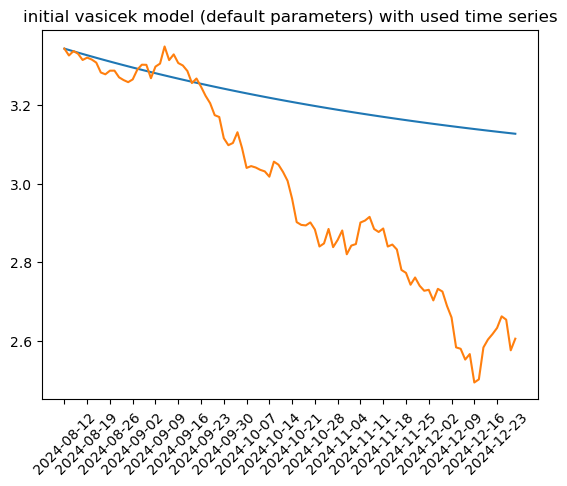

In [11]:
plt.plot(data.index, daata)
plt.plot(data)
plt.title('initial vasicek model (default parameters) with used time series')
plt.xticks(data.index[::5], rotation=45)

In [14]:
#estimate drift parameter using Euler scheme that minimizes sum of squared errors
est_drift = vasicek.estimate_drift_par(dataset = data)
drift_1=est_drift[0]
drift_2=est_drift[1]
%store drift_1

Stored 'drift_1' (float64)


Zatem mamy: {{drift_1}}

In [13]:
#estimate diffusion parameter using Euler scheme with weighted std estimator with given weights_set (geometric sequence of (9/10)**n)
diff_est = vasicek.estimate_diffusion_par_weighted_estimator(dataset = data, weights_set = ([(9/10)**i for i in range(len(daata)-1,-1,-1)]))
diff_est = diff_est[0]
diff_est = [diff_est]
diff_est

C:\Users\dawid\AppData\Local\Temp\ipykernel_236\25897462.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff_est = diff_est[0]


[0.006787752156224831]

#vasicek model with estimated parameters
vasicek_fitted = SDE(n_t_drift_vasicek, est_drift, n_t_diffusion_vasicek, diff_est, diffusion_prime_vasicek, diff_prime_default)
estimated_model = vasicek_fitted.simulate_paths(T = len(data), name = 'Milstein', x0 = float(data.iloc[0]), N=len(data), random=1)

In [105]:
#vasicek model with estimated parameters
vasicek_fitted = SDE(drift_vasicek, est_drift, diffusion_vasicek, diff_est, diffusion_prime_vasicek, diff_prime_default)
estimated_model = vasicek_fitted.simulate_paths(T = len(data), name = 'Euler', x0 = float(data.iloc[0]), N=len(data), random=0)

C:\Users\dawid\AppData\Local\Temp\ipykernel_16684\996177590.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  estimated_model = vasicek_fitted.simulate_paths(T = len(data), name = 'Euler', x0 = float(data.iloc[0]), N=len(data), random=0)


([<matplotlib.axis.XTick at 0x1efb4b8f350>,
 [Text(0.0, 0, '2024-08-12'),
  Text(5.0, 0, '2024-08-19'),
  Text(10.0, 0, '2024-08-26'),
  Text(15.0, 0, '2024-09-02'),
  Text(20.0, 0, '2024-09-09'),
  Text(25.0, 0, '2024-09-16'),
  Text(30.0, 0, '2024-09-23'),
  Text(35.0, 0, '2024-09-30'),
  Text(40.0, 0, '2024-10-07'),
  Text(45.0, 0, '2024-10-14'),
  Text(50.0, 0, '2024-10-21'),
  Text(55.0, 0, '2024-10-28'),
  Text(60.0, 0, '2024-11-04'),
  Text(65.0, 0, '2024-11-11'),
  Text(70.0, 0, '2024-11-18'),
  Text(75.0, 0, '2024-11-25'),
  Text(80.0, 0, '2024-12-02'),
  Text(85.0, 0, '2024-12-09'),
  Text(90.0, 0, '2024-12-16'),
  Text(95.0, 0, '2024-12-23')])

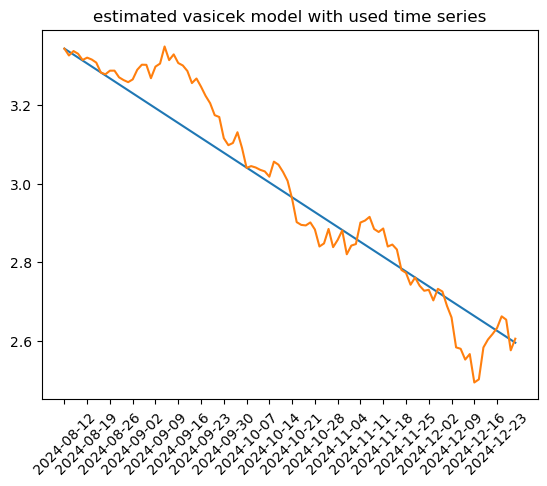

In [106]:
plt.plot(data.index, estimated_model)
plt.plot(data)
plt.title('estimated vasicek model with used time series')
plt.xticks(data.index[::5], rotation=45)

## The final parameters of my model are:

In [16]:
[drift_1,drift_2,diff_est[0]]

[4.5415660094197115e-05, -163.78467277028497, 0.006787752156224831]

### Now is the time for simulations and predicting future values

In [107]:
number_of_periods_in_future = 4 #seting number of perios that user wants to estimate values in
future=10 #number of observations to be estimated in the future
simuls=100
N=10 #n.o. periods

C:\Users\dawid\AppData\Local\Temp\ipykernel_16684\3929767871.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_est_milstein = n_t_vasicek.simulate_paths(T = number_of_periods_in_future, name = 'Milstein', x0 = float(data.iloc[-1]), N=N, random=1)


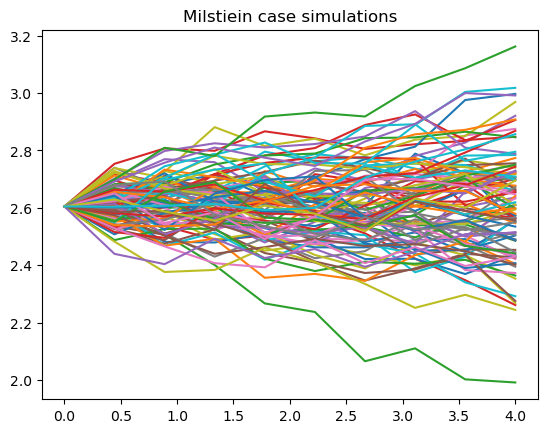

In [108]:
av_list_m=[0 for i in range(N)]
for paths in range(simuls):
    path_est_milstein = n_t_vasicek.simulate_paths(T = number_of_periods_in_future, name = 'Milstein', x0 = float(data.iloc[-1]), N=N, random=1)
    
    #policz\sprawdz czemu to tak skacze, przeciez to sensu nie ma xD
    
    plt.plot(np.linspace(0,number_of_periods_in_future,N), path_est_milstein)
    plt.title('Milstiein case simulations')
    for vals in range(len(path_est_milstein)):
        av_list_m[vals]=av_list_m[vals]+path_est_milstein[vals]

for vals in range(len(av_list)):
    av_list_m[vals]=av_list_m[vals]/simuls

C:\Users\dawid\AppData\Local\Temp\ipykernel_16684\1601081194.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_est = vasicek.simulate_paths(T = number_of_periods_in_future, name = 'Euler', x0 = float(data.iloc[-1]), N=N, random=1)


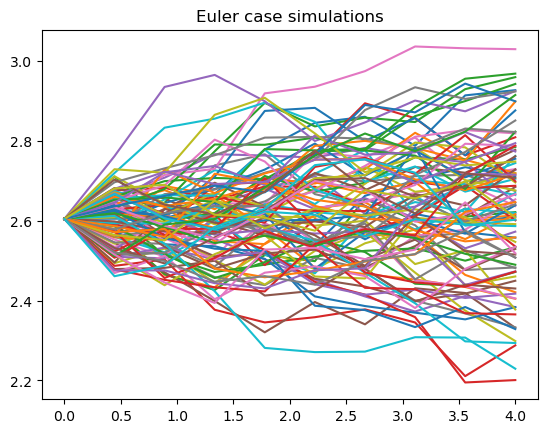

In [109]:
#Simulating paths using Euler scheme

av_list=[0 for i in range(N)]
for paths in range(simuls):
    path_est = vasicek.simulate_paths(T = number_of_periods_in_future, name = 'Euler', x0 = float(data.iloc[-1]), N=N, random=1)
    
    #policz\sprawdz czemu to tak skacze, przeciez to sensu nie ma xD
    plt.plot(np.linspace(0,number_of_periods_in_future,N), path_est)
    plt.title('Euler case simulations')
    for vals in range(len(path_est)):
        av_list[vals]=av_list[vals]+path_est[vals]

for vals in range(len(av_list)):
    av_list[vals]=av_list[vals]/simuls

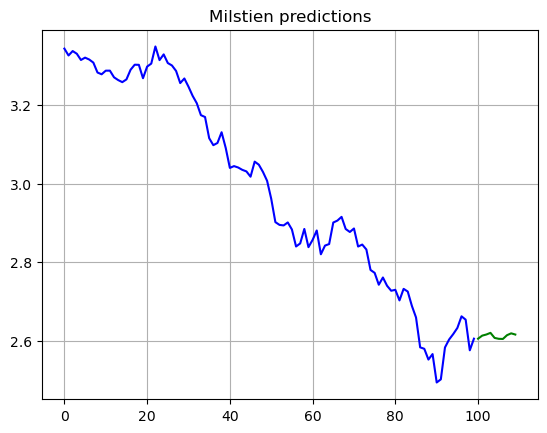

In [110]:
plt.plot(np.arange(0,100,1),data['Yield'].values, color='blue')
plt.plot(np.arange(100,100+future,1),av_list_m,color='green')
plt.title('Milstien predictions')
plt.grid()

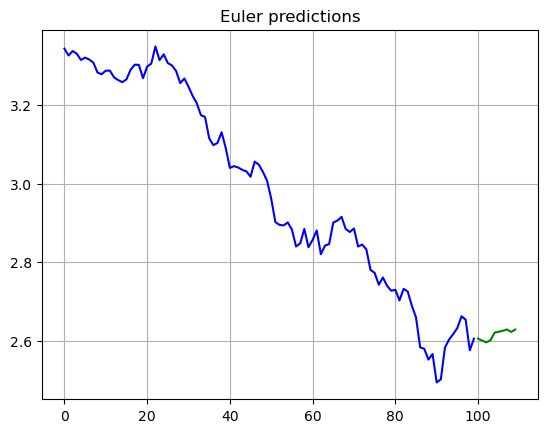

In [111]:
plt.plot(np.arange(0,100,1),data['Yield'].values, color='blue')
plt.plot(np.arange(100,100+future,1),av_list,color='green')
plt.title('Euler predictions')
plt.grid()